# K-means 알고리즘

In [ ]:
# k평균을 이용한 붓꽃 데이터 셋 clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width',
                                            'petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# KMeans 객체 생성하고 군집화 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.labels_)
# print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# 군집화 잘되어있는지 확인
irisDF['cluster']=kmeans.labels_
irisDF['target']=iris.target

# groupby에서 'sepal_width'는 다른 피처명으로 바꿔도 결과는 동일
iris_result=irisDF.groupby(['target','cluster'])['sepal_width'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_width, dtype: int64


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 2차원 평면에 데이터 포인트별로 군집화된 결과 시각화(pca차원축소로 시각화 가능하게하기)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


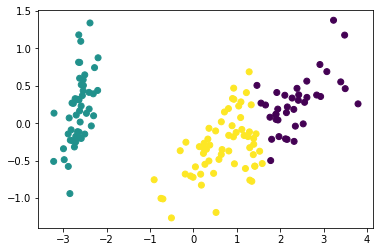

In [ ]:
plt.scatter(x=irisDF.loc[:,'pca_x'],y=irisDF.loc[:,'pca_y'],c=irisDF['cluster'])

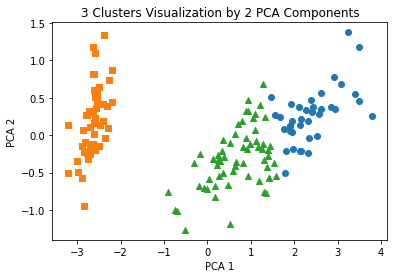

In [ ]:
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [ ]:
# Clustering 알고리즘 테스트를 위한 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# n_samples: 생성할 총 데이터 개수, n_features: 데이터 피처 개수
# centers: 군집 개수, cluster_std: 군집 데이터의 표준편차
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd
# clusterDF의 ftr1,ftr2 피처는 pca축소가 아니라 make_blobs()로 만든 피처 두개임
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
print(clusterDF.head(3))

clusterDF[clusterDF['target']==2]

       ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0


,ftr1,ftr2,target
0,-1.692427,3.622025,2
3,-1.448724,3.384245,2
5,-0.908302,1.970778,2
9,-1.679427,2.602003,2
11,-0.971885,2.790224,2
...,...,...,...
181,-1.741091,2.015473,2
186,-2.102588,2.267488,2
190,-0.781425,3.189854,2
191,-1.760374,2.308688,2


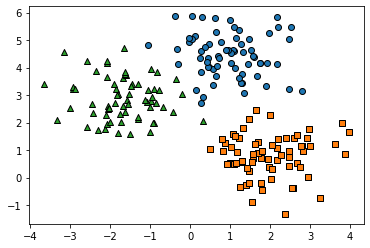

In [ ]:
# make_blobs()으로 만들어진 데이터 포인트들을 시각화
target_list=np.unique(y)
markers=['o','s','^']
for target in target_list:
  target_cluster=clusterDf[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',
              marker=markers[target])
plt.show()

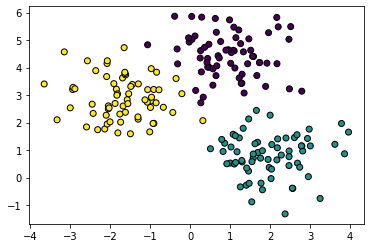

In [ ]:
# 간단하게는 이렇게 시각화 (군집화한 것 아님!)
target_list=np.unique(y)
plt.scatter(x=clusterDF['ftr1'],y=clusterDF['ftr2'],edgecolor='k',c=y)

[[ 0.990103    4.44666506]
 [ 1.95763312  0.81041752]
 [-1.70636483  2.92759224]]


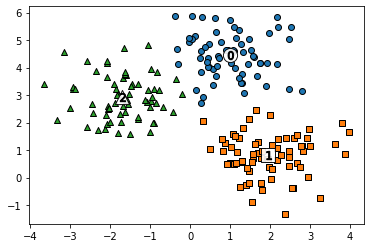

In [ ]:
# K-means 클러스터링 수행 및 개별 클러스터 중심 위치 시각화
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^']
print(centers)

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
              marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,
              edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
              marker='$%d$'%label)
plt.show()

In [ ]:
# 잘 군집화되어있는가 확인
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64

# 실루엣분석 (군집화 평가)

In [ ]:
# 붓꽃 데이터 셋을 이용한 클러스터 평가
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# silhouette_samples: 각 데이터 포인트의 실루엣계수, silhouette_score: 전체 데이터의 실루엣 계수값 평균!
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster']=kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [ ]:
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhoutte_samples() return 값의 shape',score_samples.shape)

irisDF['silhouette_coeff']=score_samples
irisDF.head(5)

silhoutte_samples() return 값의 shape (150,)


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhoutte_coeff,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302,0.849302


In [ ]:
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터셋 Silhoutte Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhoutte Analysis Score:0.553


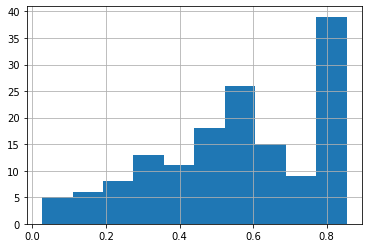

In [ ]:
irisDF['silhouette_coeff'].hist()

In [ ]:
# 군집별로 실루엣 계수 구하기
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [4]:
# 클러스터별 평균 실루엣계수 시각화를 통한 클러스터 개수 최적화해보기
def visualize_silhouette(cluster_lists,X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples,silhouette_score
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.cm as cm
    import math
  
    n_cols=len(cluster_lists)
    fig,axs=plt.subplots(figsize=(4*n_cols,4),nrows=1,ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer=KMeans(n_clusters=n_cluster,max_iter=500,random_state=0)
        cluster_labels=clusterer.fit_predict(X_features)
    
        sil_avg=silhouette_score(X_features,cluster_labels)
        sil_values=silhouette_samples(X_features,cluster_labels)
    
        y_lower=10
        axs[ind].set_title('Number of Cluster:'+str(n_cluster)+
                       '\nSilhouette Score:'+str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])

        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i=ith_cluster_sil_values.shape[0]
            y_upper=y_lower+size_cluster_i

            color=cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_sil_values,
                             facecolor=color,edgecolor=color,alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower=y_upper+10
            axs[ind].axvline(x=sil_avg,color='red',linestyle='--')

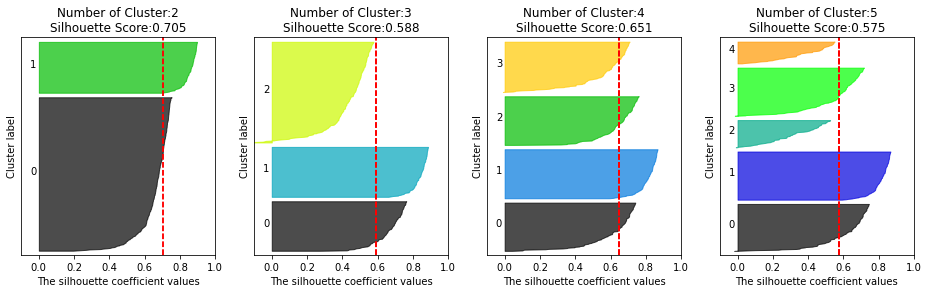

In [5]:
# make_blobs를 통해 4개의 군집 중심의 500개의 2차원 데이터셋 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,
               center_box=(-10,10),shuffle=True,random_state=1)

visualize_silhouette([2,3,4,5],X)

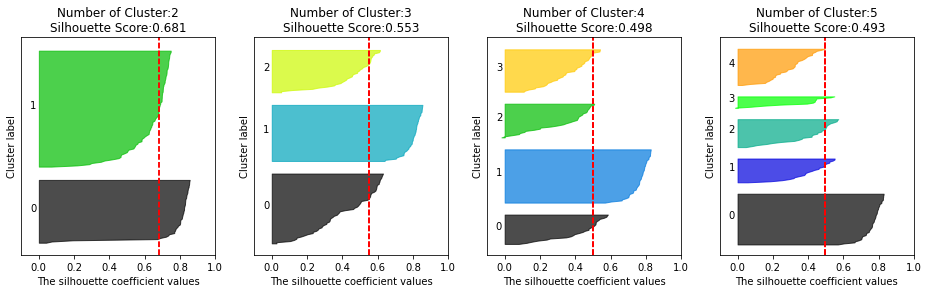

In [6]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


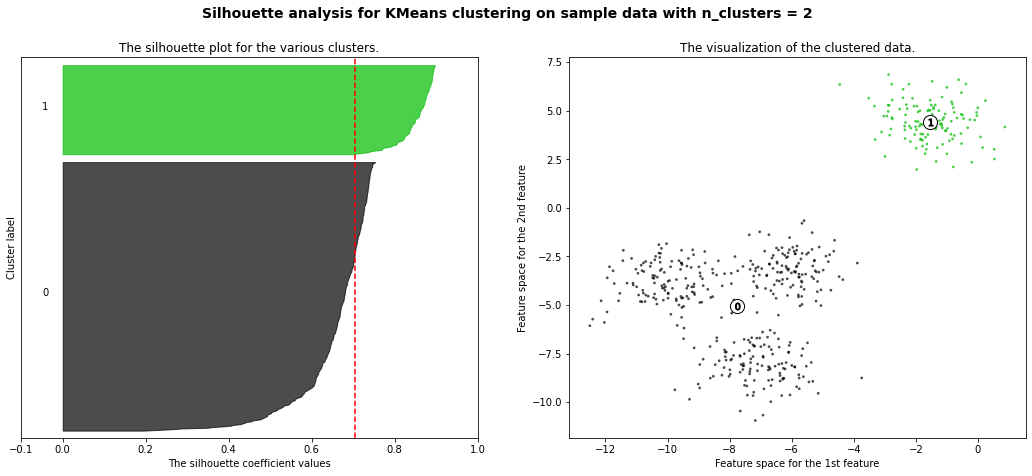

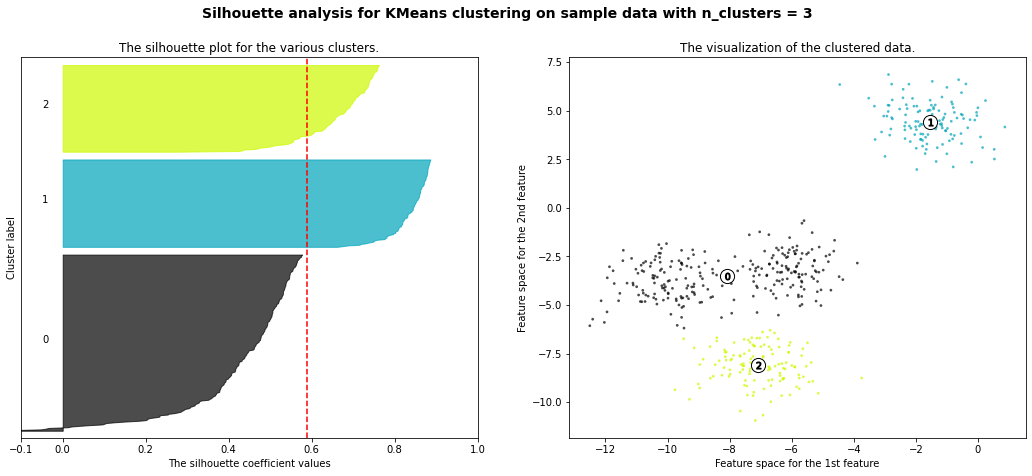

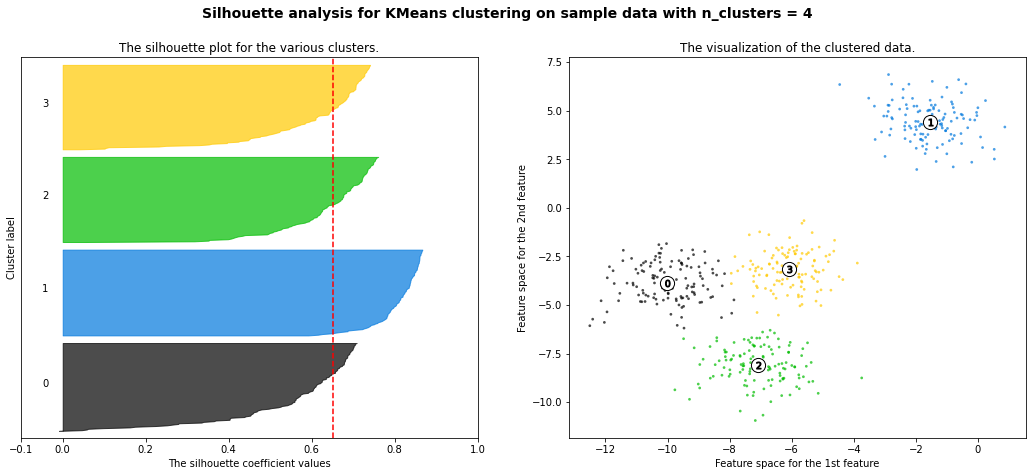

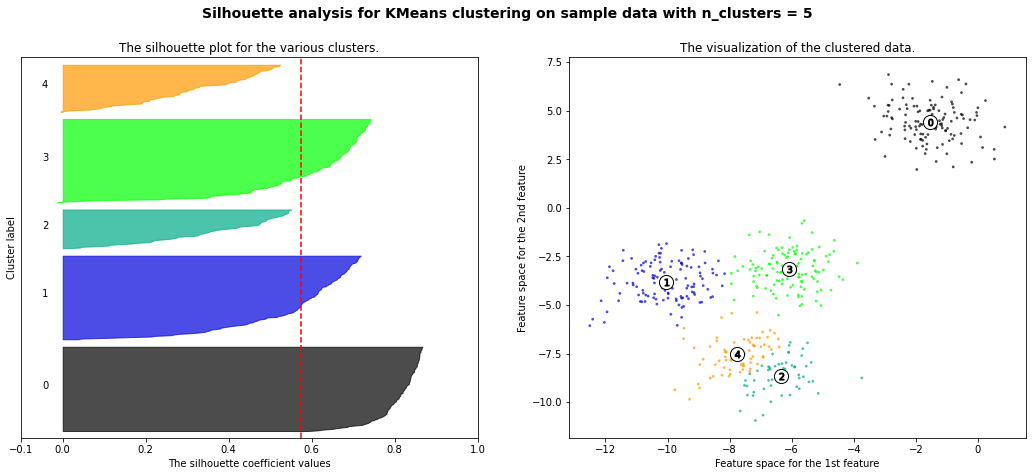

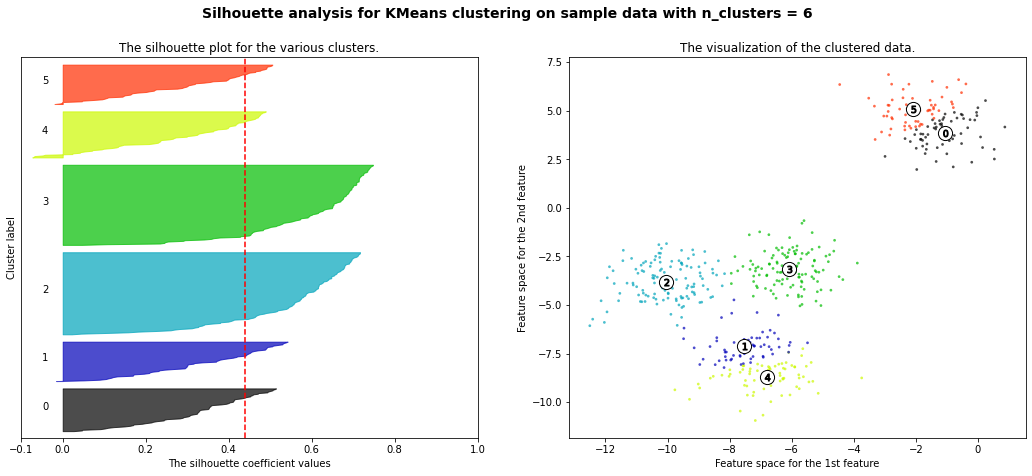

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# 평균이동(Mean Shift)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


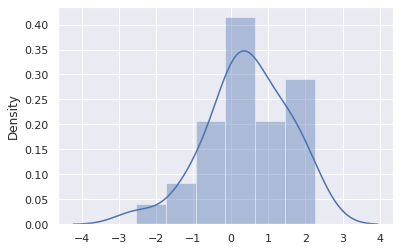

In [ ]:
# KDE(kernel density estimation)의 이해
## seaborn의 distplot()을 이용한 KDE 시각화
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(0)
x=np.random.normal(0,1,size=30)
print(x)
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


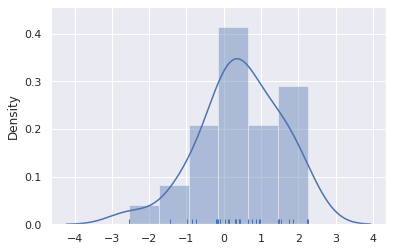

In [ ]:
sns.distplot(x,rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


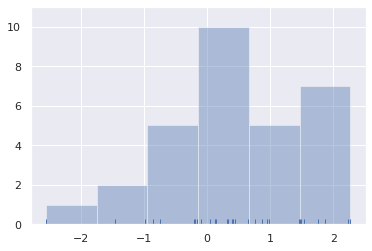

In [ ]:
sns.distplot(x,kde=False,rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


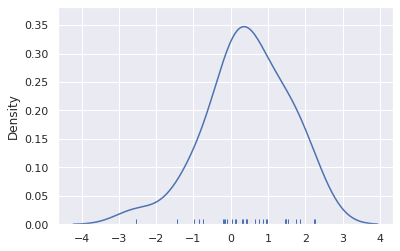

In [ ]:
sns.distplot(x,hist=False,rug=True)

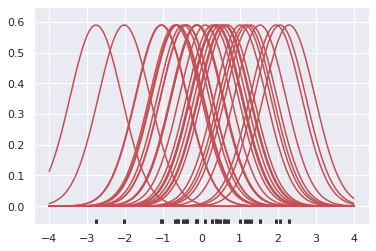

In [ ]:
from scipy import stats

x=np.random.normal(0,1,size=30)
bandwidth=1.06*x.std()*x.size**(-1/6)
support=np.linspace(-4,4,200)

kernels=[]
for x_i in x:
  kernel=stats.norm(x_i,bandwidth).pdf(support)
  kernels.append(kernel)
  plt.plot(support,kernel,color='r')

sns.rugplot(x,color='.2',linewidth=3)

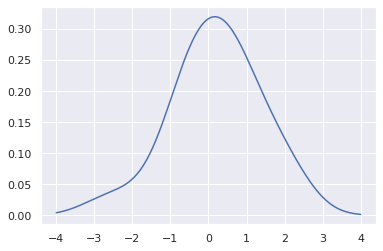

In [ ]:
from scipy.integrate import trapz
density=np.sum(kernels,axis=0)
density/=trapz(density,support)
plt.plot(support,density)

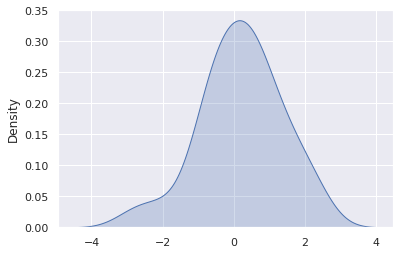

In [ ]:
sns.kdeplot(x,shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


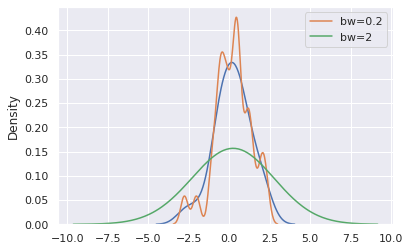

In [ ]:
# bandwidth에 따른 KDE 변화
sns.kdeplot(x)
sns.kdeplot(x,bw=.2,label='bw=0.2')
sns.kdeplot(x,bw=2,label='bw=2')
plt.legend()

**사이킷런을 이용한 Mean Shift**

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)

meanshift=MeanShift(bandwidth=0.9)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))
print(len(cluster_labels),'\n',cluster_labels)

cluster labels 유형: [0 1 2 3 4 5 6 7]
200 
 [5 0 0 1 4 1 2 6 0 1 0 1 0 0 0 1 2 2 6 3 1 2 0 0 3 5 7 1 5 1 6 4 1 0 2 2 0
 2 7 3 2 1 3 5 4 4 0 1 0 0 0 2 1 5 5 1 2 2 0 4 1 5 0 2 2 1 2 6 1 6 7 0 0 1
 5 1 2 2 2 3 1 0 0 2 2 0 0 1 0 2 3 1 7 0 2 0 0 1 1 2 2 4 1 0 5 5 2 0 5 6 0
 1 2 5 0 0 6 2 1 1 2 2 1 0 2 0 3 2 1 4 1 6 2 2 0 2 2 0 2 1 5 1 4 2 2 0 3 3
 2 0 2 3 5 1 0 2 2 2 0 0 6 1 1 1 0 5 2 1 2 2 6 7 5 2 1 1 6 3 0 6 0 1 2 2 7
 6 1 2 4 4 1 1 6 2 6 2 5 2 0 2]


In [ ]:
# bandwidth 크기 1로 증가하여 평균이동 군집화 수행
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))
print(len(cluster_labels),'\n',cluster_labels)

cluster labels 유형: [0 1 2]
200 
 [1 0 0 1 0 1 2 2 0 1 0 1 0 0 0 1 2 2 0 1 1 2 0 0 1 0 2 1 1 1 0 0 1 0 2 2 0
 2 2 1 2 1 1 1 0 0 0 1 0 0 0 2 1 1 1 1 2 2 0 0 1 1 0 2 2 1 2 2 1 2 2 0 0 1
 0 1 2 2 2 1 1 0 0 2 2 0 0 1 0 2 1 1 2 0 2 0 0 1 1 2 2 0 1 0 1 0 2 0 0 2 0
 1 2 1 0 0 0 2 1 1 2 2 1 0 2 0 1 2 1 0 1 2 2 2 0 2 2 0 2 1 1 1 0 2 2 0 1 1
 2 0 2 1 1 1 0 2 2 2 0 0 1 1 1 1 0 0 2 1 2 2 0 2 0 2 1 1 0 1 0 2 0 1 2 2 2
 0 1 2 0 0 1 1 2 2 2 2 1 2 0 2]


In [ ]:
# 최적의 bandwidth를 estimate_bandwidth()로 계산한 뒤에 다시 군집화 수행
from sklearn.cluster import estimate_bandwidth
bandwidth=estimate_bandwidth(X,quantile=0.25)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.689


In [ ]:
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

best_bandwidth=estimate_bandwidth(X,quantile=0.25)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print(np.unique(cluster_labels))
clusterDF

[0 1 2]


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


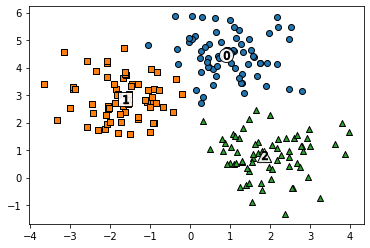

In [ ]:
import matplotlib.pyplot as plt

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              edgecolor='k',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='$%d$' % label)

plt.show()

In [ ]:
# 위 코드에서 label_cluster 데이터프레임 이해하기
label_cluster

,ftr1,ftr2,target,meanshift_label
6,2.472119,0.437033,1,2
7,1.656842,2.441289,1,2
16,2.684330,0.524528,1,2
17,2.168830,0.642201,1,2
21,1.459464,0.236513,1,2
...,...,...,...,...
193,1.412540,0.346024,1,2
194,1.130322,1.522622,1,2
195,2.956576,0.033718,1,2
197,2.783411,1.151438,1,2


In [ ]:
# 군집화
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
